In [305]:
import pandas as pd 

url = "https://raw.githubusercontent.com/deslum/learning-by-playing/master/ML/australian_beer.csv"
df=pd.read_csv(url)

df.head()

,Month,Mlitres
0,1956-01,93.2
1,1956-02,96.0
2,1956-03,95.2
3,1956-04,77.1
4,1956-05,70.9


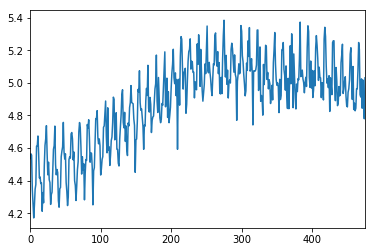

In [306]:
import matplotlib.pyplot as plt
import numpy as np

df['log_Mlitres'] = np.log(df['Mlitres'])

df['log_Mlitres'].plot(legend=False)

In [307]:
df['Month'] = pd.to_datetime(df['Month'], format='%Y-%m')
new_dates = pd.date_range('1956-01-01', '1995-08-01', freq='MS')
new_dates = pd.Index(df['Month']) | new_dates
df2 = pd.DataFrame({'Month': new_dates})
df = pd.merge(df, df2, on='Month', how='right')
df.head()

,Month,Mlitres,log_Mlitres
0,1956-01-01,93.2,4.534748
1,1956-02-01,96.0,4.564348
2,1956-03-01,95.2,4.555980
3,1956-04-01,77.1,4.345103
4,1956-05-01,70.9,4.261270


In [308]:
from sklearn.linear_model import LinearRegression


df['MonthNum'] = range(1, len(df) + 1)
df['MonthSQR'] = df['MonthNum'] * df['MonthNum']
df['MonthSQR_3'] = df['MonthNum'] * df['MonthNum'] * df['MonthNum']

y = np.log(df['Mlitres'])

for x in range(1, 13):
    df['season_' + str(x)] = df['Month'].dt.month == x

season_columns = ['season_' + str(x) for x in range(2, 13)]

# Удаляем колонку с правильным ответом
df = df.drop('log_Mlitres', axis=1)
df = df.drop('Mlitres', axis=1)


X = df[['MonthNum'] + ['MonthSQR'] + season_columns]

X.head()



,MonthNum,MonthSQR,season_2,season_3,season_4,season_5,season_6,season_7,season_8,season_9,season_10,season_11,season_12
0,1,1,False,False,False,False,False,False,False,False,False,False,False
1,2,4,True,False,False,False,False,False,False,False,False,False,False
2,3,9,False,True,False,False,False,False,False,False,False,False,False
3,4,16,False,False,True,False,False,False,False,False,False,False,False
4,5,25,False,False,False,True,False,False,False,False,False,False,False


In [309]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(
                               # максимальная глубина дерева
                               max_depth=20,
                               # минимальное число элементов в узле для разбиения (может быть долей)
                               min_samples_split=5,
                               # минимальное число элементов в листе (может быть долей)
                               min_samples_leaf=5,
                               # предварительная сортировка.
                               # ускоряет обучение на данных небольшого размера или с ограниченной глубиной дерева.
                               # иначе замедляет обучение.
                               presort=False)



In [310]:
model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=20, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=5,
           min_samples_split=5, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [311]:
model.score(X_test, y_test)

0.8613624165280103

0.9432519210435005

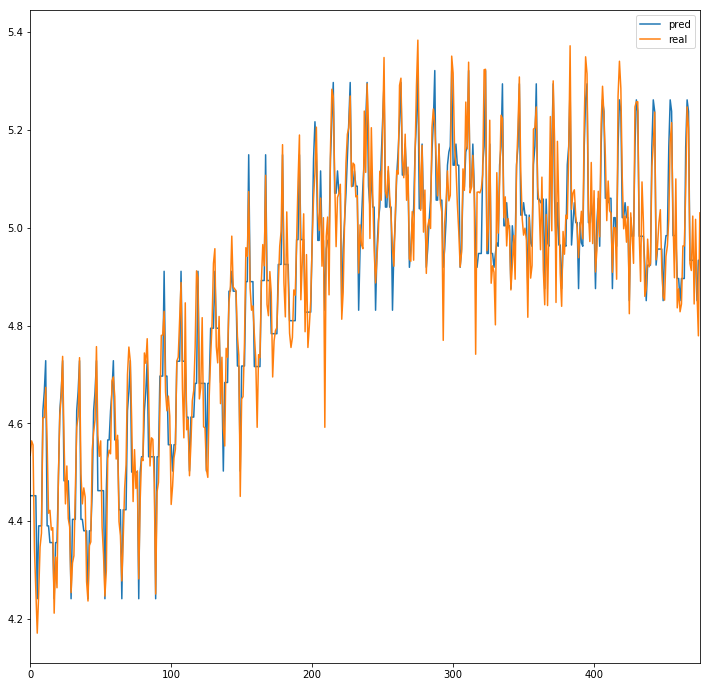

In [312]:
model = DecisionTreeRegressor(
                               # максимальная глубина дерева
                               max_depth=20,
                               # минимальное число элементов в узле для разбиения (может быть долей)
                               min_samples_split=5,
                               # минимальное число элементов в листе (может быть долей)
                               min_samples_leaf=5,
                               # предварительная сортировка.
                               # ускоряет обучение на данных небольшого размера или с ограниченной глубиной дерева.
                               # иначе замедляет обучение.
                               presort=False)
model.fit(X, y)


pred = pd.DataFrame({
    'pred': model.predict(X),
    'real': y})
pred.plot(figsize=(12, 12))

model.score(X_test, y_test)

In [313]:
pd.DataFrame({'feature': X.columns,
              'importance': model.feature_importances_}).sort_values('importance', ascending=False)

,feature,importance
1,MonthSQR,0.772998
12,season_12,0.070052
0,MonthNum,0.058249
6,season_6,0.039689
11,season_11,0.033891
10,season_10,0.017364
3,season_3,0.003922
7,season_7,0.002429
8,season_8,0.000810
9,season_9,0.000595
